In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28,28,1))
x_test = x_test.reshape((len(x_test), 28,28,1))
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras.utils import np_utils

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encode = LabelEncoder()

encoded_labels_train = encode.fit_transform(y_train)
encoded_labels_test = encode.fit_transform(y_test)

dummy_y_train = np_utils.to_categorical(encoded_labels_train)
dummy_y_test = np_utils.to_categorical(encoded_labels_test)

In [ ]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Flatten, Reshape

In [ ]:
input_img = Input(shape = (28,28,1))
x = Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu')(input_img)
x = Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu')(x)
x = Flatten()(x)
x = Dense(25, activation = 'relu')(x)

output = Dense(10, activation = 'softmax')(x)



In [ ]:
pred_model = keras.Model(input_img, output)

In [ ]:
import tensorflow as tf

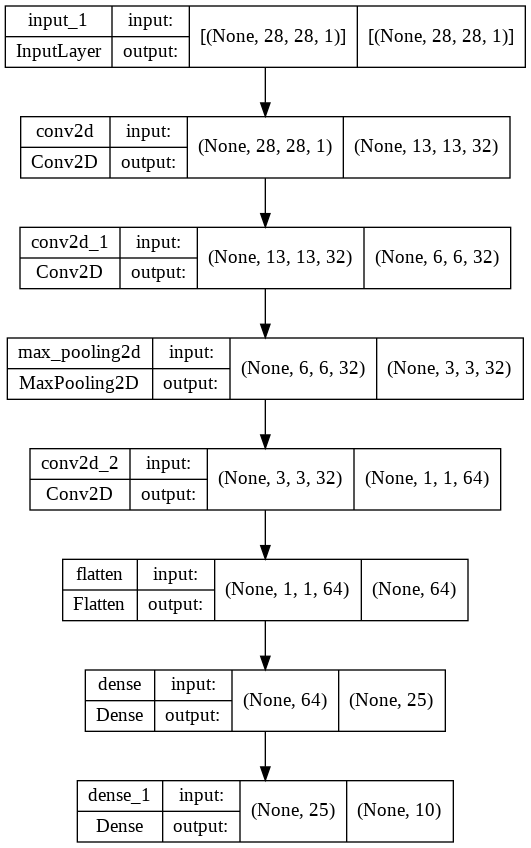

In [ ]:
tf.keras.utils.plot_model(
    pred_model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
pred_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
import h5py
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 200)
mcp = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = pred_model.fit(x_train[:55000], dummy_y_train[:55000],
                                     epochs = 50, validation_data = (x_train[55000:], dummy_y_train[55000:]), callbacks = [es,mcp])

Epoch 1/50
1718/1719 [============================>.] - ETA: 0s - loss: 0.5801 - accuracy: 0.7897
Epoch 1: val_accuracy improved from -inf to 0.84780, saving model to best_model.h5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.5800 - accuracy: 0.7897 - val_loss: 0.4083 - val_accuracy: 0.8478
Epoch 2/50
1715/1719 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8593
Epoch 2: val_accuracy improved from 0.84780 to 0.85460, saving model to best_model.h5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3819 - accuracy: 0.8593 - val_loss: 0.3809 - val_accuracy: 0.8546
Epoch 3/50
1716/1719 [============================>.] - ETA: 0s - loss: 0.3343 - accuracy: 0.8761
Epoch 3: val_accuracy improved from 0.85460 to 0.86900, saving model to best_model.h5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3347 - accuracy: 0.8759 - val_loss: 0.3659 - val_accuracy: 0.8690
Epoch 4/50
1714/1719 [=========================

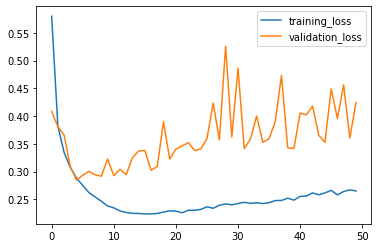

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from keras.models import load_model

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
preds = saved_model.predict(x_test)

In [ ]:
matrix = confusion_matrix(dummy_y_test.argmax(axis=1), preds.argmax(axis=1))
matrix

array([[859,   0,  15,  15,   7,   1,  97,   0,   6,   0],
       [  4, 968,   2,  17,   2,   0,   5,   0,   2,   0],
       [ 17,   0, 840,   7,  84,   0,  52,   0,   0,   0],
       [ 25,   5,  20, 881,  38,   1,  28,   0,   2,   0],
       [  0,   1,  66,  21, 853,   0,  58,   0,   1,   0],
       [  1,   0,   0,   0,   0, 970,   0,  21,   0,   8],
       [134,   2,  80,  23,  97,   0, 655,   0,   9,   0],
       [  0,   0,   0,   0,   0,   5,   0, 969,   0,  26],
       [  4,   1,   4,   4,   5,   2,   3,   4, 973,   0],
       [  0,   0,   0,   0,   0,   5,   0,  24,   0, 971]])

In [ ]:
print(classification_report(dummy_y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.84      0.83      1000
           3       0.91      0.88      0.90      1000
           4       0.79      0.85      0.82      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.66      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

